In [6]:
!pip install tables

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 26.3 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.2/546.2 kB 19.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [tables]2m4/5 [tables]]


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
pd.set_option('display.precision', 15)

In [11]:
file = "/home/idies/workspace/Storage/THobbs/persistent/Data/combined_dataset.h5"

In [10]:
import h5py

with h5py.File("/home/idies/workspace/Storage/THobbs/persistent/Data/combined_dataset.h5", "r") as f:
    def explore(name, item):
        print(name, type(item))

    f.visititems(explore)

observation_0 <class 'h5py._hl.dataset.Dataset'>
observation_1 <class 'h5py._hl.dataset.Dataset'>
observation_10 <class 'h5py._hl.dataset.Dataset'>
observation_100 <class 'h5py._hl.dataset.Dataset'>
observation_101 <class 'h5py._hl.dataset.Dataset'>
observation_102 <class 'h5py._hl.dataset.Dataset'>
observation_103 <class 'h5py._hl.dataset.Dataset'>
observation_104 <class 'h5py._hl.dataset.Dataset'>
observation_105 <class 'h5py._hl.dataset.Dataset'>
observation_106 <class 'h5py._hl.dataset.Dataset'>
observation_107 <class 'h5py._hl.dataset.Dataset'>
observation_108 <class 'h5py._hl.dataset.Dataset'>
observation_109 <class 'h5py._hl.dataset.Dataset'>
observation_11 <class 'h5py._hl.dataset.Dataset'>
observation_110 <class 'h5py._hl.dataset.Dataset'>
observation_111 <class 'h5py._hl.dataset.Dataset'>
observation_112 <class 'h5py._hl.dataset.Dataset'>
observation_113 <class 'h5py._hl.dataset.Dataset'>
observation_114 <class 'h5py._hl.dataset.Dataset'>
observation_115 <class 'h5py._hl.data

In [15]:
with h5py.File(file, "r") as f:
    dset = f["observation_0"]
    print("dtype:", dset.dtype)
    print("shape:", dset.shape)
    print("attrs:", list(dset.attrs.keys()))

dtype: float64
shape: (220212, 4)
attrs: ['filename', 'object_type', 'original_file', 'source_name']


In [81]:
with h5py.File(file, "r") as f:
    obs0 = f["observation_0"][:]

In [82]:
df = pd.DataFrame(obs0)
df.head()

,0,1,2,3
0,491.0,531.0,3.026844258169358e+08,268.0
1,463.0,533.0,3.026844258258279e+08,417.0
2,490.0,541.0,3.026844260215126e+08,61.0
3,491.0,488.0,3.026844317509071e+08,63.0
4,492.0,477.0,3.026844318459039e+08,31.0


In [83]:
df.columns = ['x', 'y', 'time', 'pi']
df.head()

,x,y,time,pi
0,491.0,531.0,3.026844258169358e+08,268.0
1,463.0,533.0,3.026844258258279e+08,417.0
2,490.0,541.0,3.026844260215126e+08,61.0
3,491.0,488.0,3.026844317509071e+08,63.0
4,492.0,477.0,3.026844318459039e+08,31.0


In [84]:
df.shape

(220212, 4)

In [85]:
df.iloc[0]['time']

np.float64(302684425.8169358)

In [86]:
df.iloc[1]['time']

np.float64(302684425.8258279)

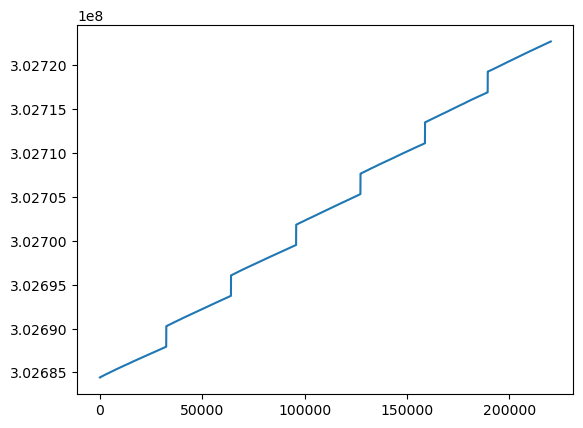

In [87]:
plt.plot(df['time'])

In [88]:
df['time_diff'] = df['time'].diff().fillna(0)
df['time_diff'].describe()

count    220212.000000000000000
mean          0.173910382494880
std          12.056023787742486
min           0.000000000000000
25%           0.033454835414886
50%           0.077176630496979
75%           0.151477068662643
max        2343.974876344203949
Name: time_diff, dtype: float64

In [89]:
outliers = df[df['time_diff'] > 2000]
print(outliers)

            x      y                   time     pi             time_diff
32385   498.0  506.0  3.026902302756717e+08  169.0  2295.738878011703491
63995   495.0  503.0  3.026960357853158e+08  256.0  2302.916546225547791
95815   503.0  537.0  3.027018134153418e+08  114.0  2282.653184652328491
127232  622.0  598.0  3.027076290074078e+08  577.0  2300.162115871906281
158747  494.0  525.0  3.027134707716417e+08   63.0  2343.974876344203949
189377  509.0  514.0  3.027192568267556e+08  244.0  2331.868332266807556


In [90]:
df[32380:32390]

,x,y,time,pi,time_diff
32380,500.0,494.0,3.026879342444564e+08,100.0,0.081013441085815
32381,497.0,503.0,3.026879343067144e+08,41.0,0.062258064746857
32382,477.0,455.0,3.026879344229134e+08,15.0,0.116199016571045
32383,512.0,498.0,3.026879344565647e+08,102.0,0.033651232719421
32384,486.0,504.0,3.026879345367936e+08,203.0,0.080228984355927
32385,498.0,506.0,3.026902302756717e+08,169.0,2295.738878011703491
32386,498.0,514.0,3.026902303235525e+08,462.0,0.047880828380585
32387,484.0,505.0,3.026902465354232e+08,327.0,16.211870670318604
32388,523.0,499.0,3.026902466897808e+08,353.0,0.154357671737671
32389,527.0,502.0,3.026902468171148e+08,77.0,0.127333998680115


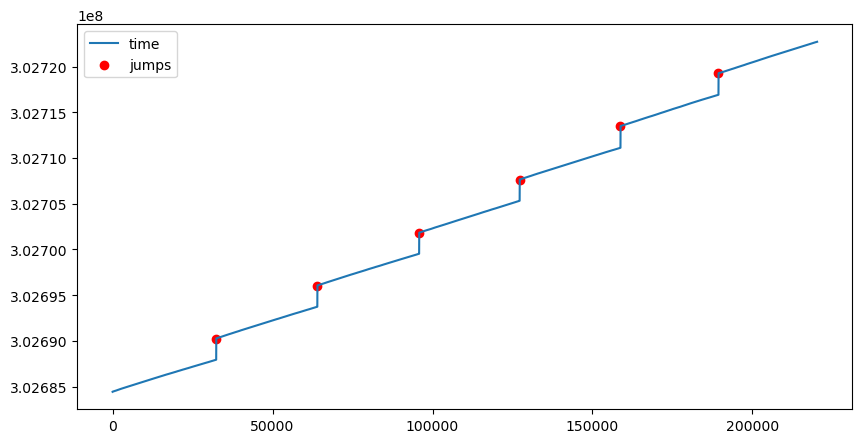

In [98]:
plt.figure(figsize=(10,5))
plt.plot(df['time'], label='time')
plt.scatter(df.index[df['time_diff'] > 2000], 
            df['time'][df['time_diff'] > 2000], 
            color='red', label='jumps')
plt.legend()
plt.show()

In [95]:
df.shape

(220212, 6)

In [96]:
# Now let's use these 6 jumps as the group
df['segment'] = (df['time_diff'] > 2000).cumsum()
groups = [g for _, g in df.groupby('segment')]
groups[0].shape

(32385, 6)

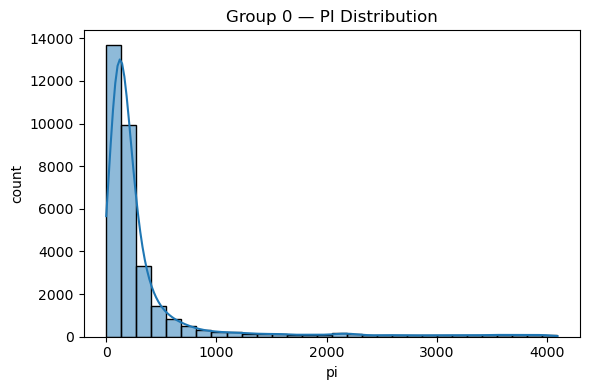

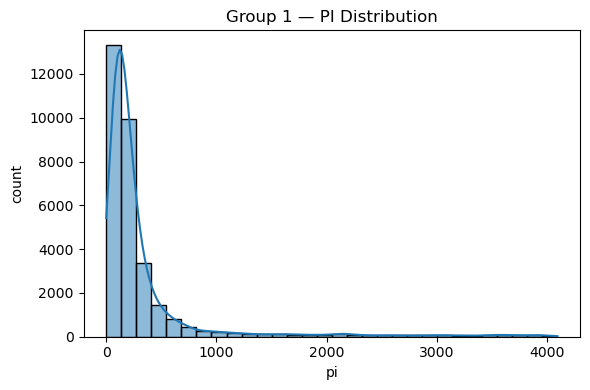

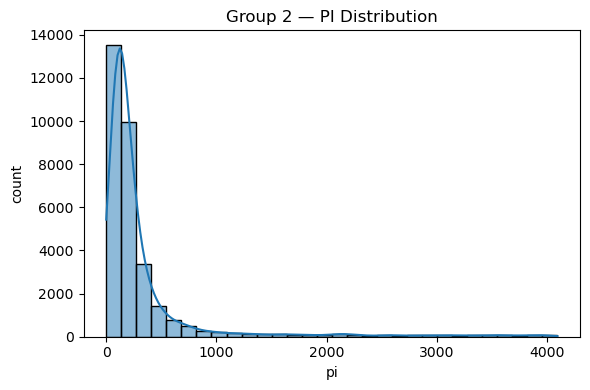

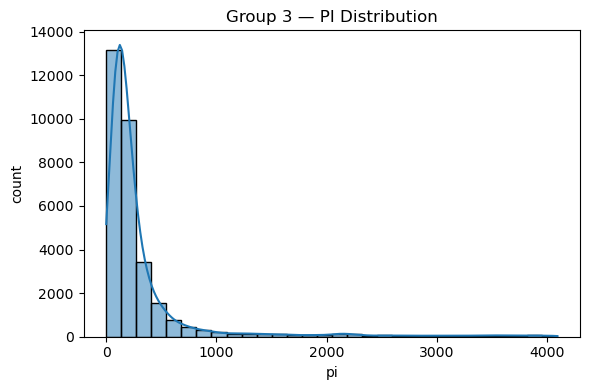

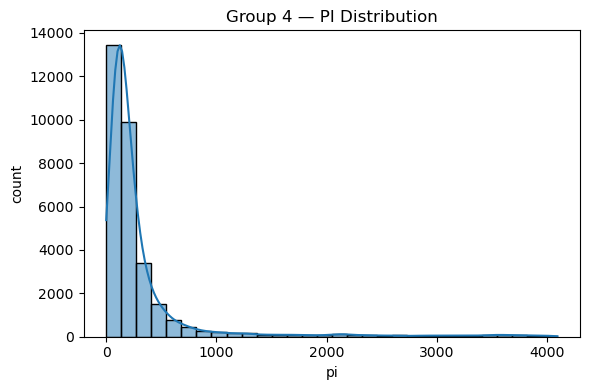

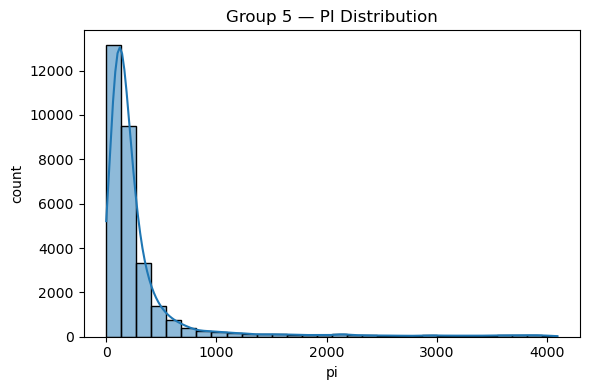

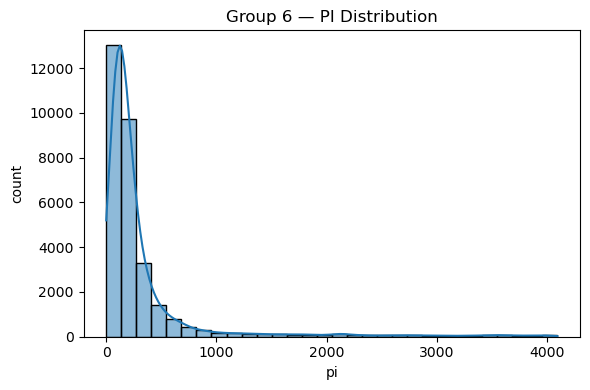

In [103]:
for i, group in enumerate(groups):
    plt.figure(figsize=(6, 4))
    sns.histplot(group['pi'], kde=True, bins=30)
    plt.title(f"Group {i} — PI Distribution")
    plt.xlabel("pi")
    plt.ylabel("count")
    plt.tight_layout()

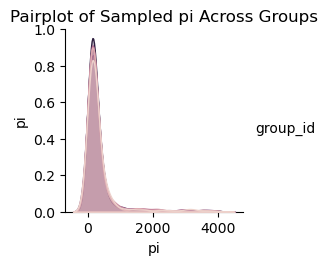

In [107]:
samples_per_group = 1000

dfs = []
for i, g in enumerate(groups):
    sample = g.sample(n=min(samples_per_group, len(g)), random_state=42)
    sample['group_id'] = i
    dfs.append(sample)

df_sampled = pd.concat(dfs, ignore_index=True)

sns.pairplot(df_sampled, vars=['pi'], hue='group_id', diag_kind='kde')
plt.suptitle("Pairplot of Sampled pi Across Groups", y=1.02)
plt.show()

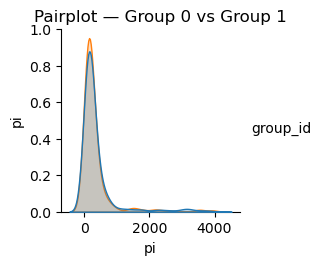

In [110]:
g0 = groups[0].sample(samples_per_group, random_state=42)
g1 = groups[1].sample(samples_per_group, random_state=42)

df_two = pd.concat([g0.assign(group_id=0), g1.assign(group_id=1)])

sns.pairplot(df_two, vars=['pi'], hue='group_id', diag_kind='kde')
plt.suptitle("Pairplot — Group 0 vs Group 1", y=1.02)
plt.show()
